# Example for running the default LCA model in AeroMAPS

The default LCA module enables to assess the life-cycle impacts of scenarios with no specific requirements or customizations. It relies on a pre-compiled LCA model stored in a JSON file. This example notebook demonstrates how to set up and run an AeroMAPS simulation using the default LCA model, and visualize the results.

> Note: while convenient, the default LCA model may not cover all specific needs. For example, the default LCA model cannot deal with custom energy carriers or specific processes added by the user. In such cas
> es, users are encouraged to develop custom LCA models tailored to their scenarios and requirements, as described in the [custom LCA example notebook](./life_cycle_assessment_custom.ipynb).

## Import librairies and configuration

In [1]:
# --- Import libraries ---
%matplotlib widget
import sys
sys.path.insert(0, './utils/')
import matplotlib.pyplot as plt
import time
from plots import plot_stacked_evolution_subplots
plt.style.use("bmh")
from aeromaps import create_process

## Set models and create process

This example notebook covers the ICAO's LTAG integrated scenarios. The corresponding configuration files are provided in the `./data/config_files` directory.

For using the default LCA model, you must declare it in the configuration file with the following lines:
```yaml
life_cycle_assessment:
    lca_model_data_file: "../lca_data/default_model/default_lca_model.json"
    split_by: 'phase'
```

There are two inputs to provide here: 
- `lca_model_data_file`: the path to a `.json` file containing the pre-compiled LCA model
- `split_by` (optional): enables you to split the impacts to get the individual contributions of the air transport components (aircraft production, fuel combustion, etc.). 

> *Note: You may have a look at the [lca_model.json](./data/lca_data/default_model/default_lca_model.json) file to check the different impact categories and LCA parameters for the LCA model provided here.*

In [2]:
# --- Create process for IS scenario ---
process = create_process(
    configuration_file="data/config_files/config_is2medium_default_lca.yaml",  # <-- select LTAG IS scenario (from 0 to 3)
)

⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: Using Top-Down environmental model for abatement cost. Not recommended.
⚠️ Warning: reference pathway for CAC (fossil_kerosene) is not defined as bottom-up, using top-down values for CAC computation.


Import LCA Parameters:   0%|          | 0/26 [00:00<?, ?it/s]

Import LCIA functions (axis 'phase'):   0%|          | 0/24 [00:00<?, ?it/s]

Import functional units:   0%|          | 0/1 [00:00<?, ?it/s]

Import impacts metadata:   0%|          | 0/24 [00:00<?, ?it/s]

## Run AeroMAPS simulation and assessment

You may now run AeroMAPS and visualize the results.

In [3]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

Running MDA
⚠️ Warning: excess generic_biofuel production in years: [2021]. Scaling down.


/Users/s.delbecq/VSCodeProjects/AeroMAPS/aeromaps/models/yaml_interpolator.py:161: UserWarning: 
[Interpolation Model: generic_electricity_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/VSCodeProjects/AeroMAPS/aeromaps/models/yaml_interpolator.py:161: UserWarning: 
[Interpolation Model: generic_biomass_availability_global Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/VSCodeProjects/AeroMAPS/aeromaps/models/yaml_interpolator.py:161: UserWarning: 
[Interpolation Model: liquefaction_mean_mfsp_without_resource Warning]
The last reference year (2050) is lower than the end year (2070).
The value associated with the last reference year will be used as a cons

--- 3.849001169204712 seconds ---


## Visualize LCA results

In [4]:
# --- Results ---
process_data_vector_outputs = process.data["vector_outputs"]
process_data_float_inputs = process.data["float_inputs"]
process_data_climate = process.data["climate_outputs"]
lca_outputs = process.data["lca_outputs"]
lca_outputs

<xarray.DataArray 'lca' (systems: 1, impacts: 24, axis: 15, year: 71)> Size: 204kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [3.00221538e+07, 2.96361384e+07, 2.92501231e+07, ...,
          1.44738135e+07, 1.44069700e+07, 1.43401265e+07],
         [3.54274232e+08, 3.44674908e+08, 3.46016800e+08, ...,
          2.32831073e+08, 2.33221393e+08, 2.33479172e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.84033550e+08, 7.20823624e+08, 7.58366107e+08]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [2.45421205e+01, 2.43060300e+01, 2.40699395e+01, ...,
          1.28746572e+01, 1.27862485e+01, 1.26978398e+01],
         [3.31046675e+02, 3.22724300e+02, 3.24637513e+02, ...,
          2.29678400e+02, 2.30059279e+02, 2.30309403e+02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.65160119e+02, 1.73924131e+02, 1.82855108e+02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.70124778e+05, 3.61936177e+05, 3.65211618e+05, ...,
          2.95305768e+05, 2.95775387e+05, 2.96076847e+05],
         ...,
         [8.12944370e+03, 8.05121105e+03, 7.97297840e+03, ...,
          4.26333512e+03, 4.23404413e+03, 4.20475315e+03],
         [1.09624222e+05, 1.06867821e+05, 1.07500869e+05, ...,
          7.60426539e+04, 7.61685681e+04, 7.62511909e+04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.47283571e+04, 5.76321391e+04, 6.05912090e+04]]]])
Coordinates:
  * systems  (systems) object 8B 'model'
  * impacts  (impacts) object 192B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 120B 'CO2_biofuel' ... 'e_fuel_production'
  * year     (year) float64 568B 2e+03 2.001e+03 ... 2.069e+03 2.07e+03

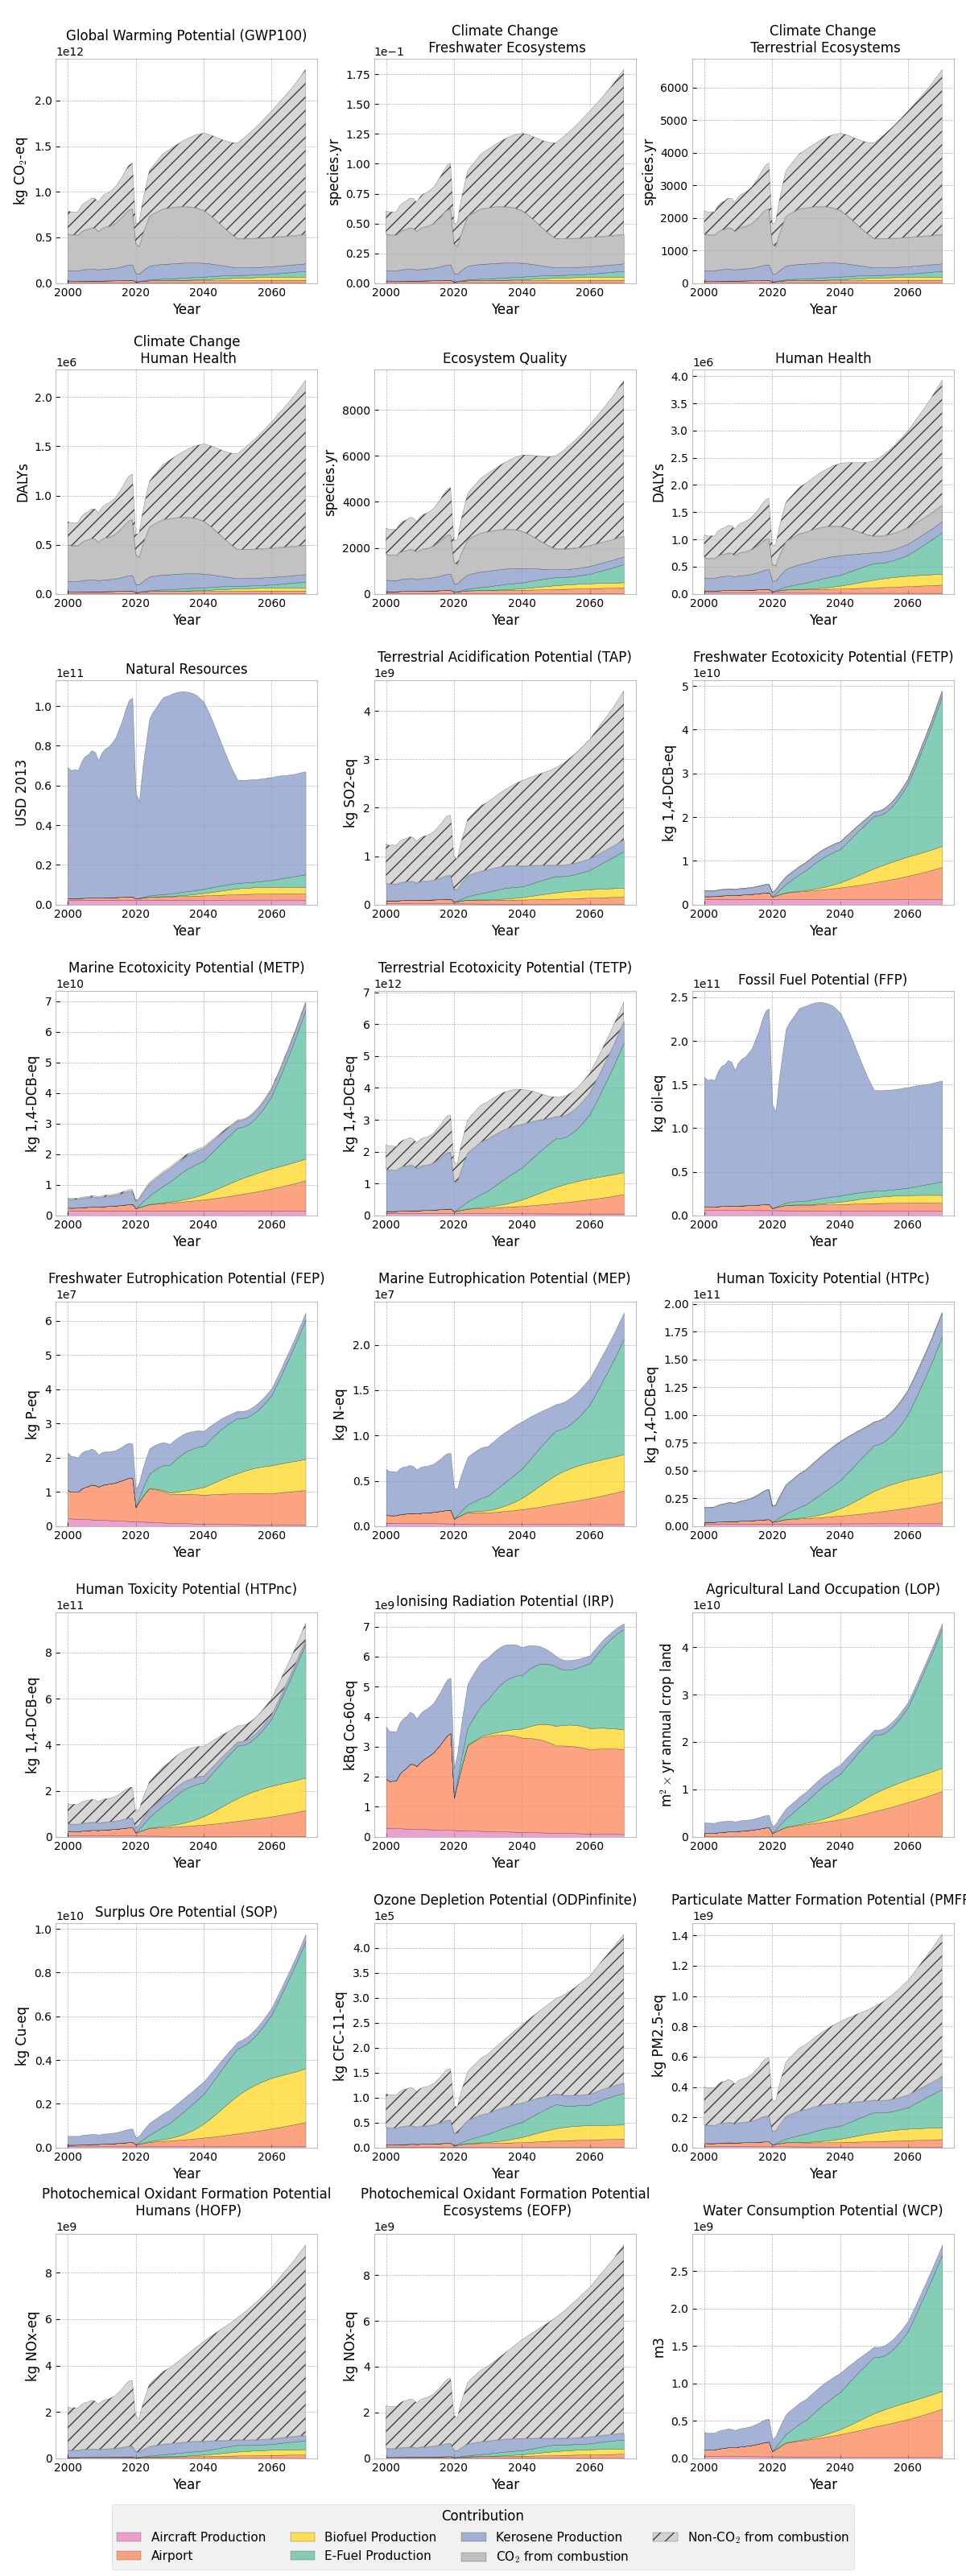

In [5]:
# --- Plots ---
plt.close()
plot_stacked_evolution_subplots(lca_outputs)